In [8]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
import matplotlib.pylab as pl
import scipy as sp
import random
import matplotlib
import time
import fct_setup as setup
import fct_general as fct

setup.SetPlotParams()

c_rescaled_dark = '#52958F'

### Eigenspectrum illustration

In [9]:
"""
General parameters
"""

C = 200
N = 1000

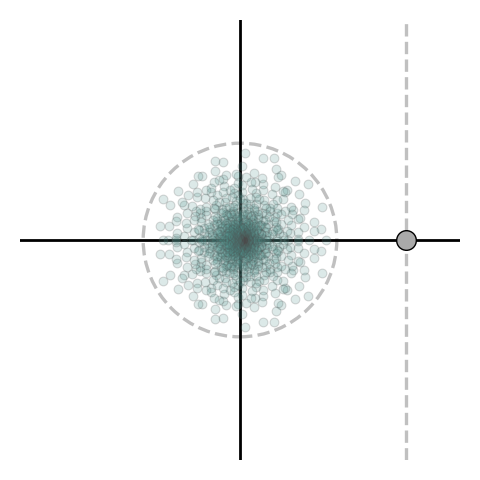

In [12]:
"""
Plot schematic 
"""

sigma = 0.23
rho = 0.08

theor_bulk = np.sqrt(C) * sigma**2
theor_outlier = C * rho**2

m, n = fct.make_connectivity_vectors(N, sigma, rho) 
P = np.outer(m, n)  
            
P_tilde = fct.sparsify_columns(P, N, C)
eigvals = sp.linalg.eigvals(P_tilde) 
eigvals = eigvals[eigvals.argsort()[::-1]]  
        

fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=200)

lim = 1.7
point_size = 10
point_opacity = 0.2

ax.grid('on', alpha=0.4)
ax.axhline(color='black')
ax.axvline(color='black')
ax.set_aspect('equal', 'box')
fct.remove_ticks_and_labels(ax)
plt.setp(ax, xlim=(-lim, lim), ylim=(-lim, lim))

# add unit circle
unit_circle = plt.Circle((0, 0), theor_bulk, color='silver', fill=False, ls='--', lw=1.2, zorder=2)
ax.add_patch(unit_circle)
    
# plot eigenvalues
ax.scatter(eigvals[1:].real, eigvals[1:].imag, fc=c_rescaled_dark, ec='#4B4B4B', lw=0.4, s=point_size, alpha=point_opacity, zorder=3, clip_on=False)
ax.axvline(theor_outlier, c='silver', ls='--', lw=1.2, zorder=1)

# highlight structural eigenvalue
ax.scatter(theor_outlier, 0, ec='black', fc='#AAAAAA', s=50, alpha=1, zorder=3)

fig.tight_layout(pad=2)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

### Rank one - Type II - independent of N

In [13]:
"""
General parameters
"""

C = 200   
sigma = 0.3
rho = 0.09

In [14]:
"""
Radius as function of number of units
"""

repeats = 1

Ns = np.linspace(C, 20*C, 12).astype('int') 
sparsities = 1-C/Ns

r_data_avg = []

Ns_fine = np.arange(C, 20*C+10, 10)  
r_theoretical = (np.sqrt(C) * sigma**2 * np.sqrt(Ns_fine-C))/np.sqrt(Ns_fine)
    
for N in Ns:
    
    r_data = []
    m, n = fct.make_connectivity_vectors(N, sigma, rho)   
    P = np.outer(m, n)

    for r in range(repeats):
    
        P_tilde = fct.sparsify_columns(P, N, C)
        P_cutoff = P_tilde - (C/N)*P 
        eigvals_P_tilde = sp.linalg.eigvals(P_tilde) 
        eigvals_P_tilde = eigvals_P_tilde[eigvals_P_tilde.argsort()[::-1]]  
        
        r_data.append(np.mean(np.abs(eigvals_P_tilde)[1:3]))

    r_data_avg.append(np.mean(r_data))

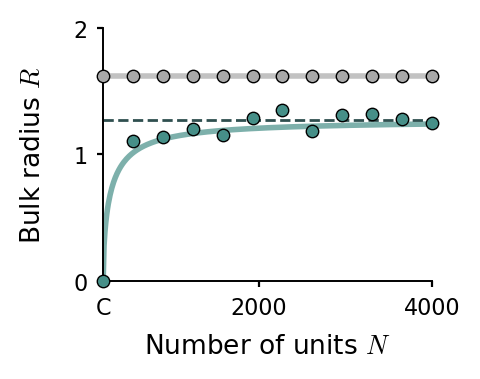

In [15]:
fig, ax = plt.subplots(figsize=(2.5, 2), dpi=200)

c_rescaled_dark = '#468F88'
ax.plot(Ns_fine, r_theoretical, c=c_rescaled_dark, label='Bulk radius $\sqrt{C} \sigma^2$', lw=2, alpha=0.7)
ax.scatter(Ns, r_data_avg, fc=c_rescaled_dark, ec='black', lw=.5, s=20, zorder=3, clip_on=False)
ax.axhline(np.sqrt(C)*sigma**2, c='darkslategrey', ls='--', lw=1)

ax.scatter(Ns, [C * rho**2]*len(Ns), fc='darkgray', ec='black', lw=.5, s=20, zorder=3, clip_on=False)
ax.axhline(C * rho**2, c='darkgrey', lw=2, alpha=0.7, label=r'Outlier    $C \; \sigma_{mn}$')

ax.set_xticks([C, 2000, 4000])
ax.set_xticklabels(['C', '2000', '4000'])    

ax.set_xlabel(r'Number of units $N$', labelpad=5)
ax.set_ylabel(r'Bulk radius $R$')
ax.set_xlim(C, Ns[-1])
plt.locator_params(axis='x', nbins=3)
plt.locator_params(axis='y', nbins=3)
ax.set_ylim(0, 2)

sns.despine(top=True, right=True, left=False, bottom=False)
fig.tight_layout()



In [ ]:
"""
Radius as a function of variance 
"""

rho = 0.1

repeats = 20

variances = np.linspace(0.01, 0.2, 10)

sigmas = np.sqrt(variances)

theor_bulk = np.sqrt(C) * variances
theor_outlier = C * rho**2

crossing_point = theor_outlier / np.sqrt(C)  # value of variance for which bulk surpasses outlier 
idx = np.abs(variances - crossing_point).argmin() + 1  # index of variances where this value occurs

data_bulk_avg = []
data_bulk_std = []
data_outlier_avg = []
data_outlier_std = []

for sigma in sigmas:
    
    data_bulk = []
    data_outlier = []
    
    m, n = fct.make_connectivity_vectors(N, sigma, rho) 
    P = np.outer(m, n)  
    
    for r in range(repeats):
        
        P_tilde = fct.sparsify_columns(P, N, C)
        eigvals = sp.linalg.eigvals(P_tilde) 
        eigvals = eigvals[eigvals.argsort()[::-1]]  
        data_bulk.append(np.mean(np.abs(eigvals)[1:3]))
        data_outlier.append(eigvals[0].real)

    data_bulk_avg.append(np.mean(data_bulk))
    data_bulk_std.append(np.std(data_bulk))
    data_outlier_avg.append(np.mean(data_outlier))
    data_outlier_std.append(np.std(data_outlier))
    

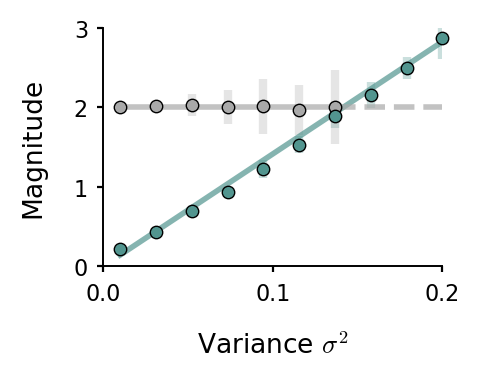

In [66]:
fig, ax = plt.subplots(figsize=(2.5, 2), dpi=200)

ax.plot(variances, theor_bulk, c=c_rescaled_dark, lw=2, alpha=0.7, label=r'Bulk     $\sqrt{C} \sigma^2$')
ax.plot(variances[:idx], [theor_outlier]*len(variances[:idx]), c='darkgray', lw=2, alpha=0.7, label=r'Outlier  $C \; \sigma_{mn}$')
ax.plot(variances[idx-1:], [theor_outlier]*len(variances[idx-1:]), c='darkgray', lw=2, alpha=0.7, ls='--')

ax.errorbar(variances, data_bulk_avg, yerr=data_bulk_std, linestyle="None", ecolor=c_rescaled_dark, alpha=0.3, elinewidth=3)
ax.errorbar(variances[:idx], data_outlier_avg[:idx], yerr=data_outlier_std[:idx], linestyle="None", ecolor='darkgray', alpha=0.3, elinewidth=3)

ax.scatter(variances[:idx], data_outlier_avg[:idx], fc='darkgray', ec='black', lw=.5, s=20, zorder=3, clip_on=False)
ax.scatter(variances, data_bulk_avg, fc=c_rescaled_dark, ec='black', lw=.5, s=20, zorder=3, clip_on=False)

ax.set_xlabel(r'Variance $\sigma^2$')
ax.set_ylabel(r'Magnitude')
ax.set_ylim(0, 3)
ax.set_xlim(0, 0.2)

plt.locator_params(axis='y', nbins=3)
plt.locator_params(axis='x', nbins=3)

sns.despine(top=True, right=True, left=False, bottom=False)
fig.tight_layout()




In [67]:
"""
Radius as a function of covariance  
"""

sigma = 0.3

repeats = 20

covariances = np.linspace(0.0, 0.02, 10)
rhos = np.sqrt(covariances)

theor_bulk = np.sqrt(C) * sigma**2
theor_outlier = C * rhos**2

crossing_point = theor_bulk / C  # value of covariance for which bulk surpasses outlier 
idx = np.abs(covariances - crossing_point).argmin() + 1  # index of variances where this value occurs

data_bulk_avg = []
data_bulk_std = []
data_outlier_avg = []
data_outlier_std = []

for i, rho in enumerate(rhos):
    
    data_bulk = []
    data_outlier = []
    
    m, n = fct.make_connectivity_vectors(N, sigma, rho)    
    P = np.outer(m, n)  
    
    for r in range(repeats):
        
        P_tilde = fct.sparsify_columns(P, N, C)
        
        eigvals = sp.linalg.eigvals(P_tilde) 
        eigvals = eigvals[eigvals.argsort()[::-1]]  
        data_bulk.append(np.mean(np.abs(eigvals)[1:3]))
        data_outlier.append(eigvals[0].real)

    data_bulk_avg.append(np.mean(data_bulk))
    data_bulk_std.append(np.std(data_bulk))
    data_outlier_avg.append(np.mean(data_outlier))
    data_outlier_std.append(np.std(data_outlier))

    
    

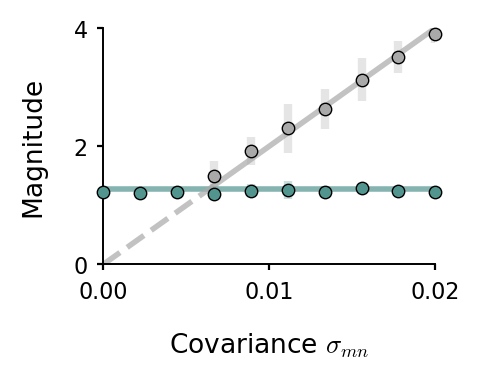

In [77]:
fig, ax = plt.subplots(figsize=(2.5, 2), dpi=200)

ax.plot(covariances, [theor_bulk]*len(rhos), c=c_rescaled_dark, lw=2, alpha=0.7)
ax.plot(covariances[idx-1:], theor_outlier[idx-1:], c='darkgray', lw=2, alpha=0.7)
ax.plot(covariances[:idx], theor_outlier[:idx], c='darkgray', lw=2, alpha=0.7, ls='--')

ax.errorbar(covariances, data_bulk_avg, yerr=data_bulk_std, linestyle="None", ecolor=c_rescaled_dark, alpha=0.3, elinewidth=3)
ax.errorbar(covariances[idx-1:], data_outlier_avg[idx-1:], yerr=data_outlier_std[idx-1:], linestyle="None", ecolor='darkgray', alpha=0.3, elinewidth=3)

ax.scatter(covariances, data_bulk_avg, label='Bulk', fc=c_rescaled_dark, ec='black', lw=.5, s=20, zorder=3, clip_on=False)
ax.scatter(covariances[idx-1:], data_outlier_avg[idx-1:], label=r'Outlier', fc='darkgray', ec='black', lw=.5, s=20, zorder=3, clip_on=False)

ax.set_xlabel(r'Covariance $\sigma_{mn}$')
ax.set_ylabel(r'Magnitude')

ax.set_ylim(0, 4)
ax.set_xlim(0, covariances[-1])

plt.locator_params(axis='y', nbins=3)
plt.locator_params(axis='x', nbins=3)

sns.despine(top=True, right=True, left=False, bottom=False)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()

